# **MeerKLASS-SSINS  Flagging Analysis  Notebook**


In [1]:
import os
import sys
sys.path.append(os.path.abspath('.'))
import mkssins
from mkssins import *
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [3]:
with open('zscore_level_1.pkl', 'rb') as f:
    zscore_level1 = pickle.load(f)



In [13]:
with open('zscore_level_4.pkl', 'rb') as f:
    zscore_level4= pickle.load(f)



In [4]:
zscore_level1.shape

(3644, 4096)

<AxesSubplot:title={'center':'Z Score (L1) (ABBA Sky-Subtraction)'}, xlabel='Frequency Chan', ylabel='Time Chan'>

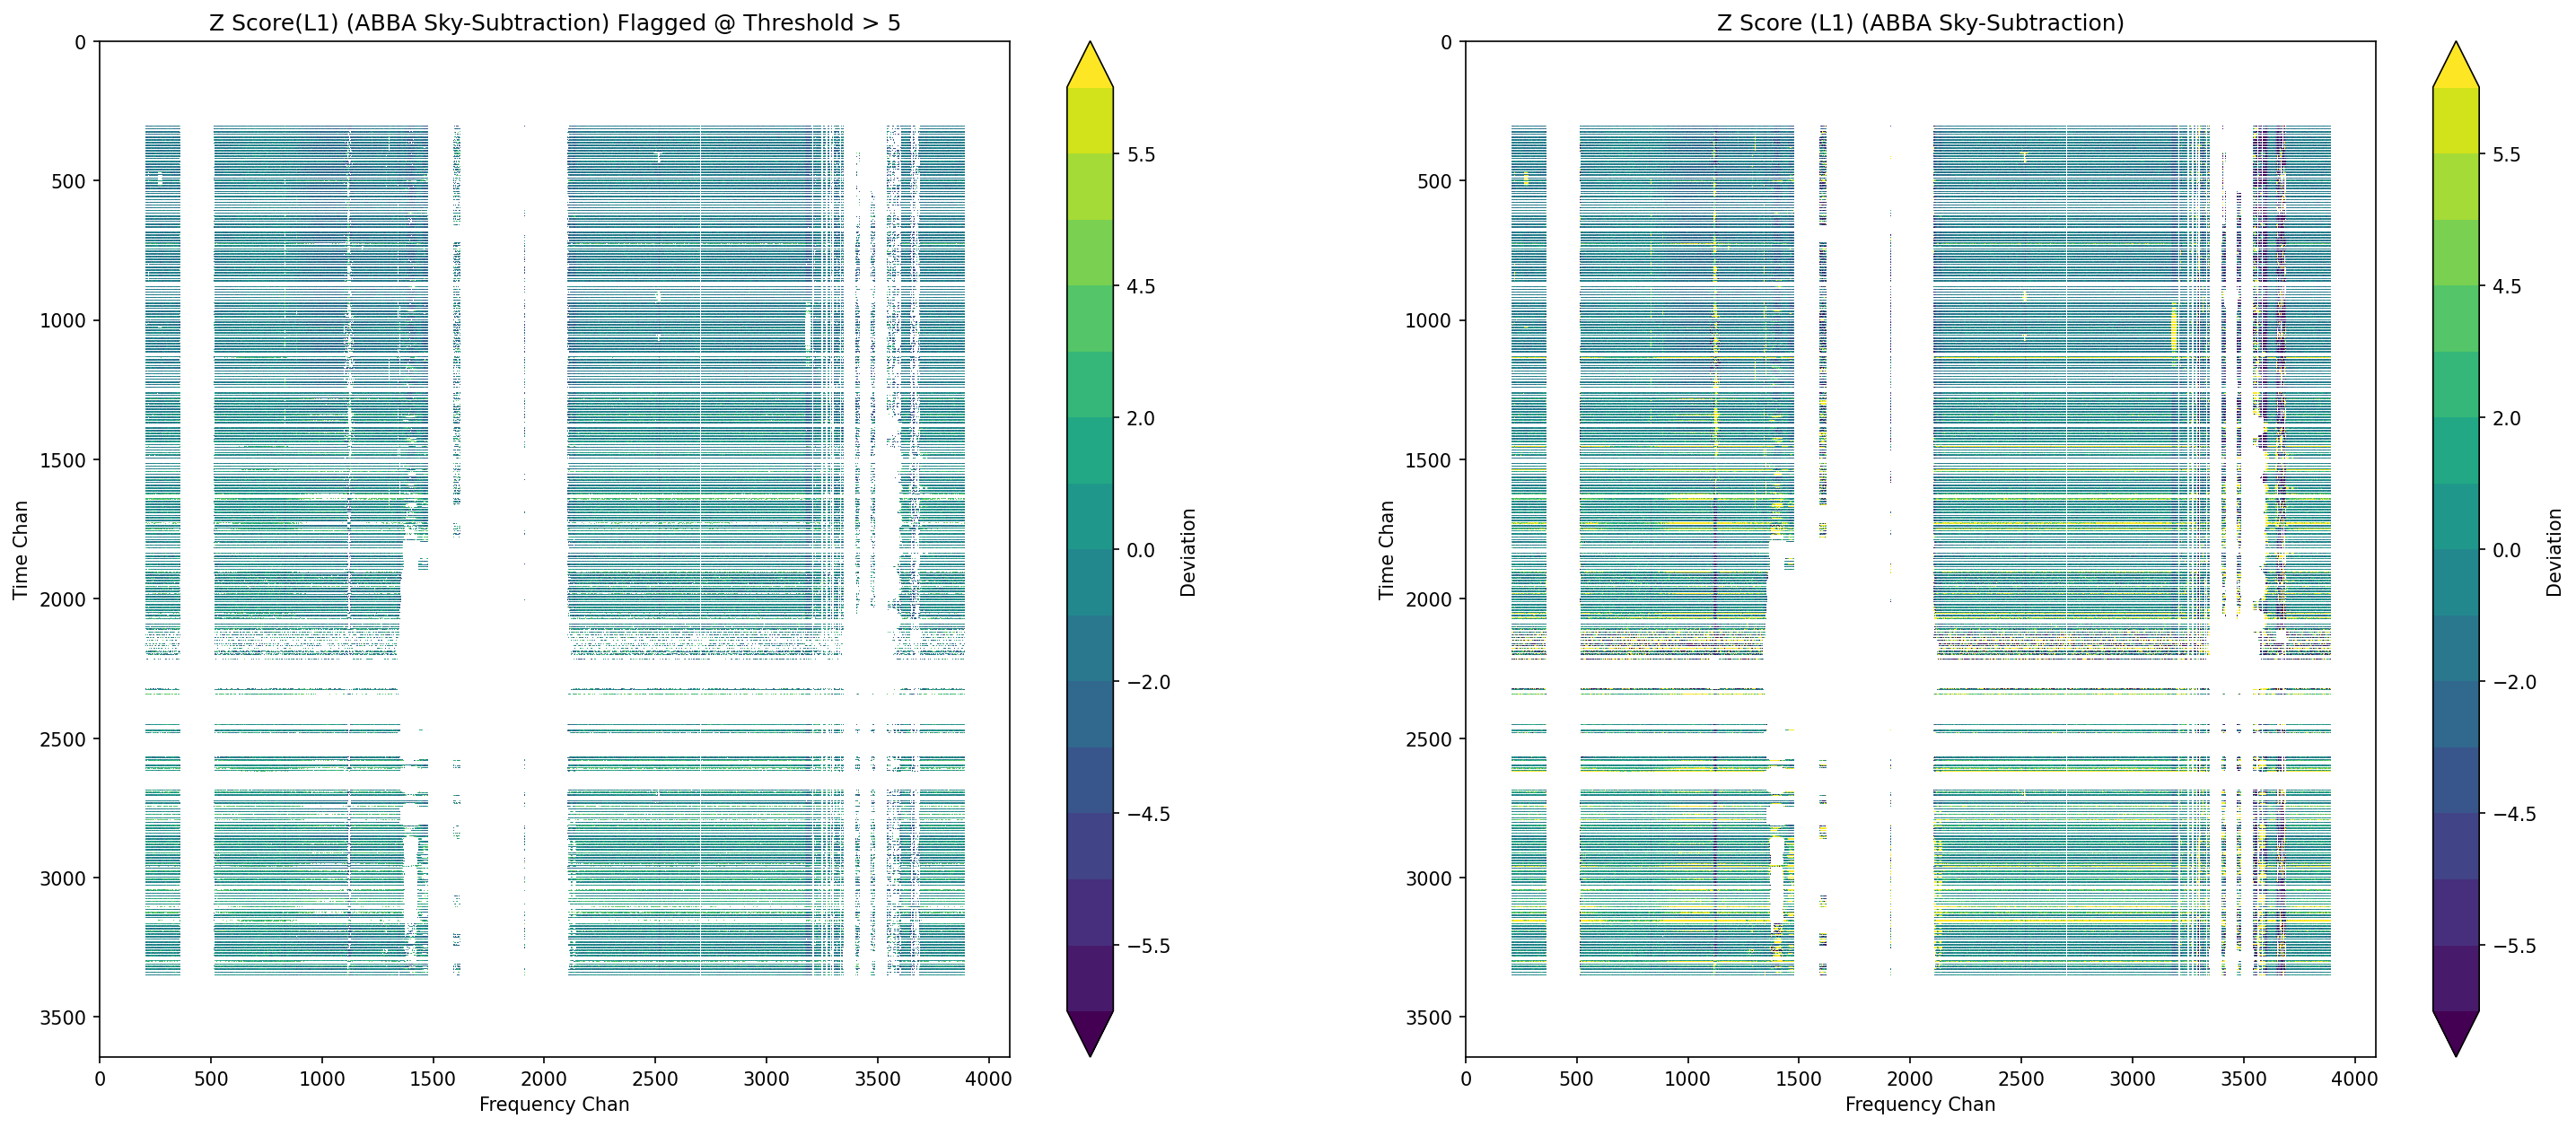

In [6]:
from matplotlib.colors import LogNorm
import matplotlib as mpl

figure, ax = plt.subplots(1, 2 , figsize=(24, 10), dpi=150)

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

plot_waterfall(data_masked, Title = 'Z Score(L1) (ABBA Sky-Subtraction) Flagged @ Threshold > 5', figsize=(20,12), cmap=cmap, norm=norm, xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Deviation', ax=ax[0]) 
plot_waterfall(zscore_level1, Title = 'Z Score (L1) (ABBA Sky-Subtraction)', figsize=(20,12), cmap=cmap, norm=norm, xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Deviation', ax=ax[1]) 

In [7]:
z_score_map_abba_mask = ((zscore_level1.astype(float) < -4.5) ^ (zscore_level1.astype(float) > 4.5) )

data_masked = np.ma.masked_array(zscore_level1, mask=z_score_map_abba_mask, fill_value = np.nan)

<AxesSubplot:title={'center':'Z Score (L1) (ABBA Sky-Subtraction)'}, xlabel='Frequency Chan', ylabel='Time Chan'>

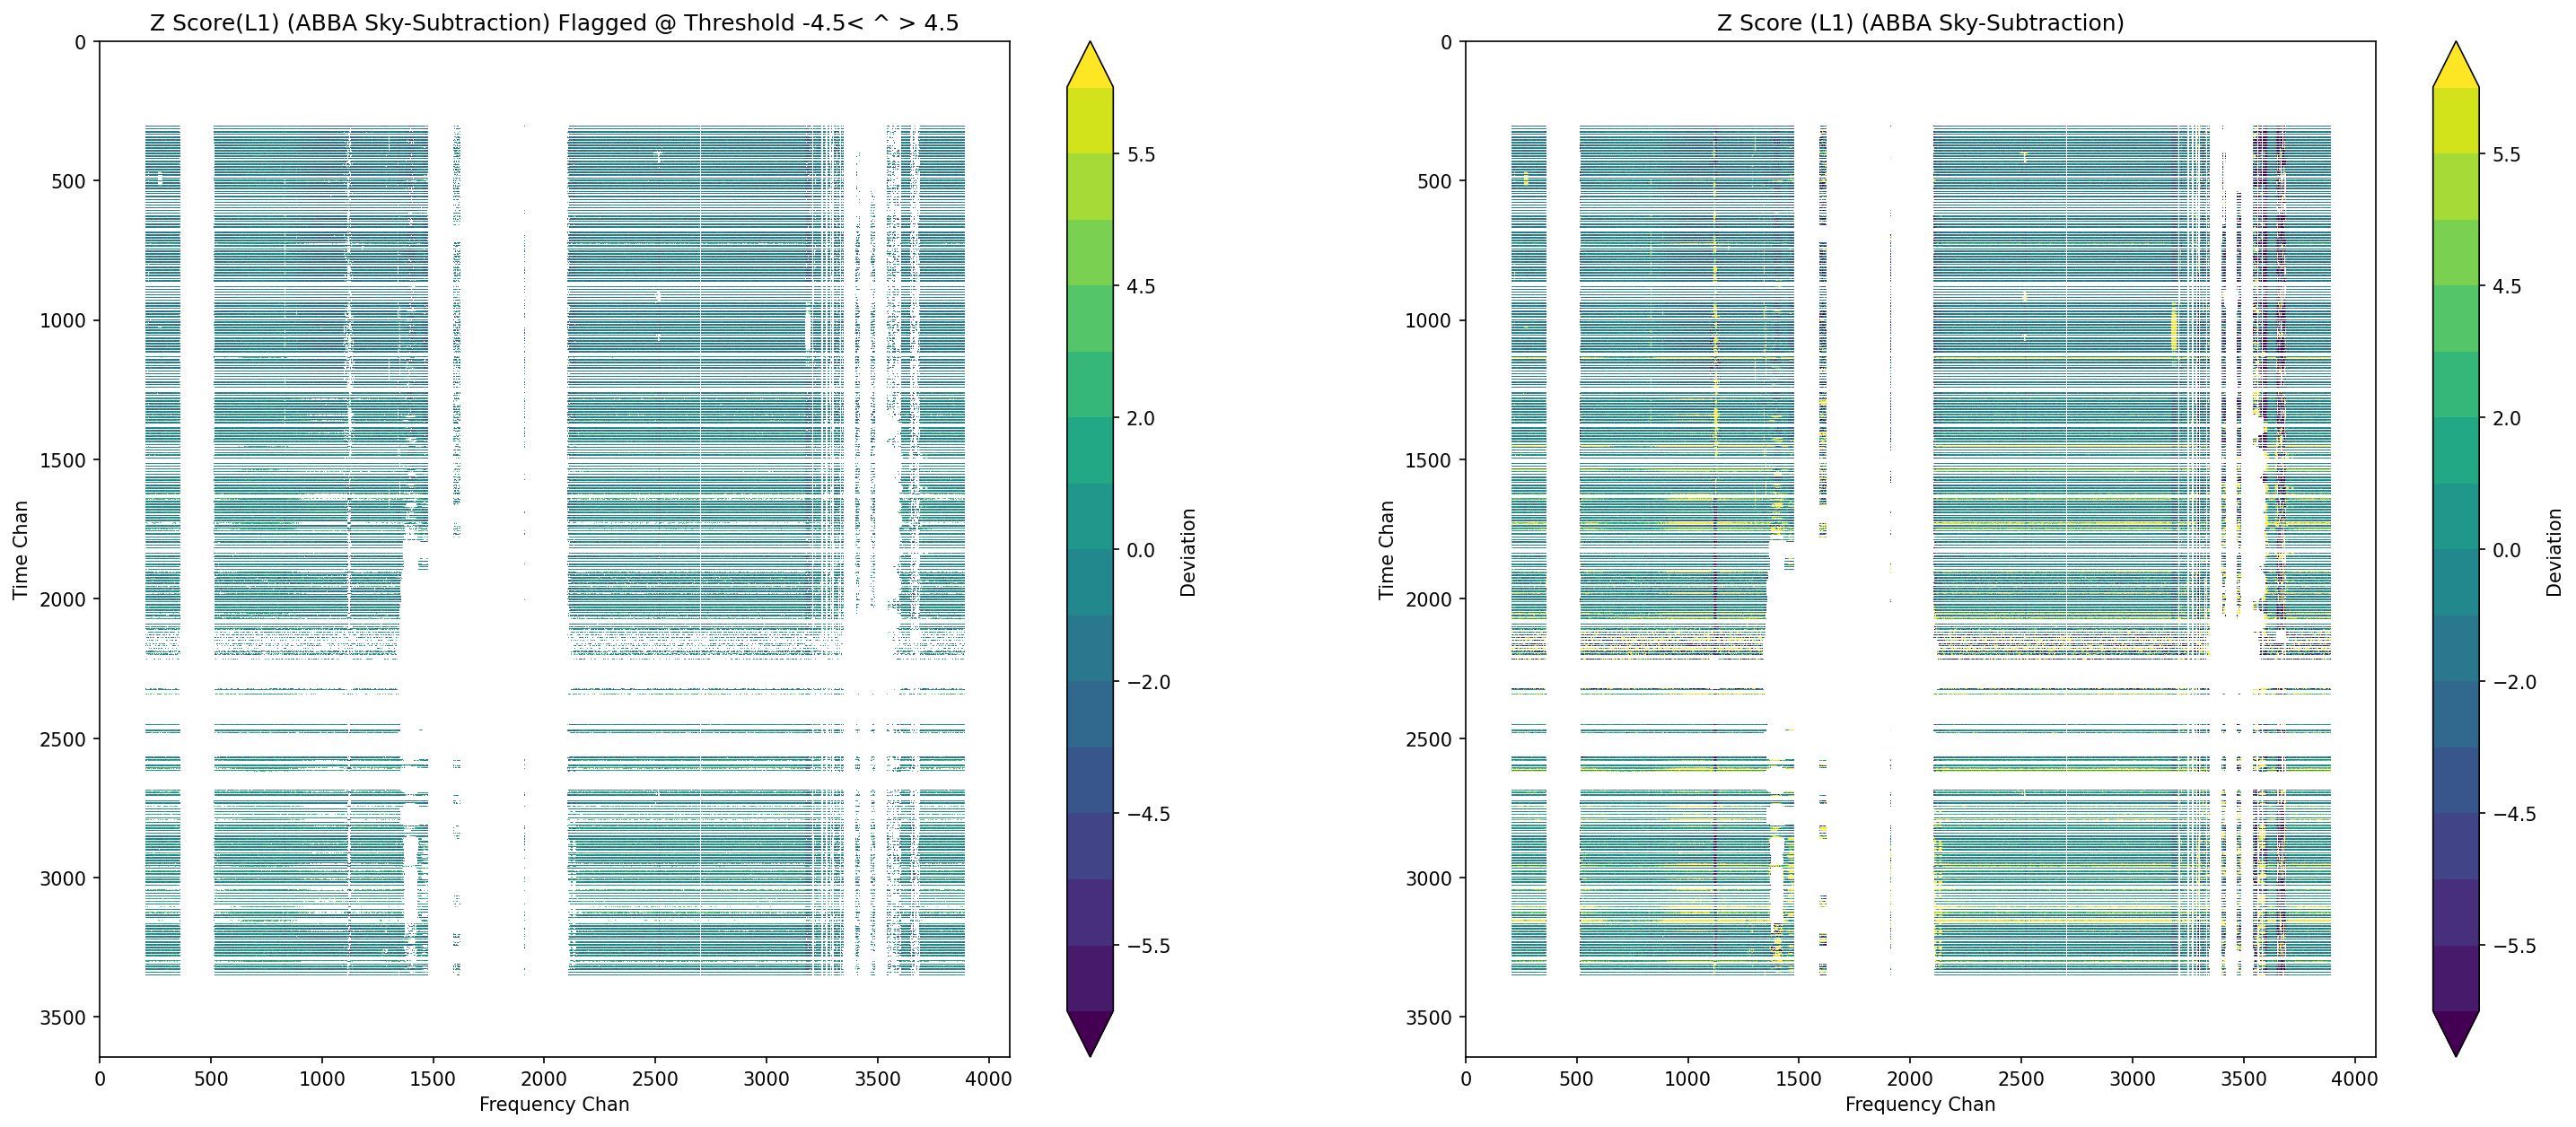

In [9]:
from matplotlib.colors import LogNorm
import matplotlib as mpl

figure, ax = plt.subplots(1, 2 , figsize=(24, 10), dpi=150)

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

plot_waterfall(data_masked, Title = 'Z Score(L1) (ABBA Sky-Subtraction) Flagged @ Threshold -4.5< ^ > 4.5', figsize=(20,12), cmap=cmap, norm=norm, xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Deviation', ax=ax[0]) 
plot_waterfall(zscore_level1, Title = 'Z Score (L1) (ABBA Sky-Subtraction)', figsize=(20,12), cmap=cmap, norm=norm, xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Deviation', ax=ax[1]) 

In [17]:
zscore_l4_mask  = ((zscore_level4.astype(float) < -5) ^ (zscore_level4.astype(float) > 5) )

data_masked = np.ma.masked_array(zscore_level4, mask=zscore_l4_mask, fill_value = np.nan)

<AxesSubplot:title={'center':'Z Score (L4) (ABBA Sky-Subtraction)'}, xlabel='Frequency Chan', ylabel='Time Chan'>

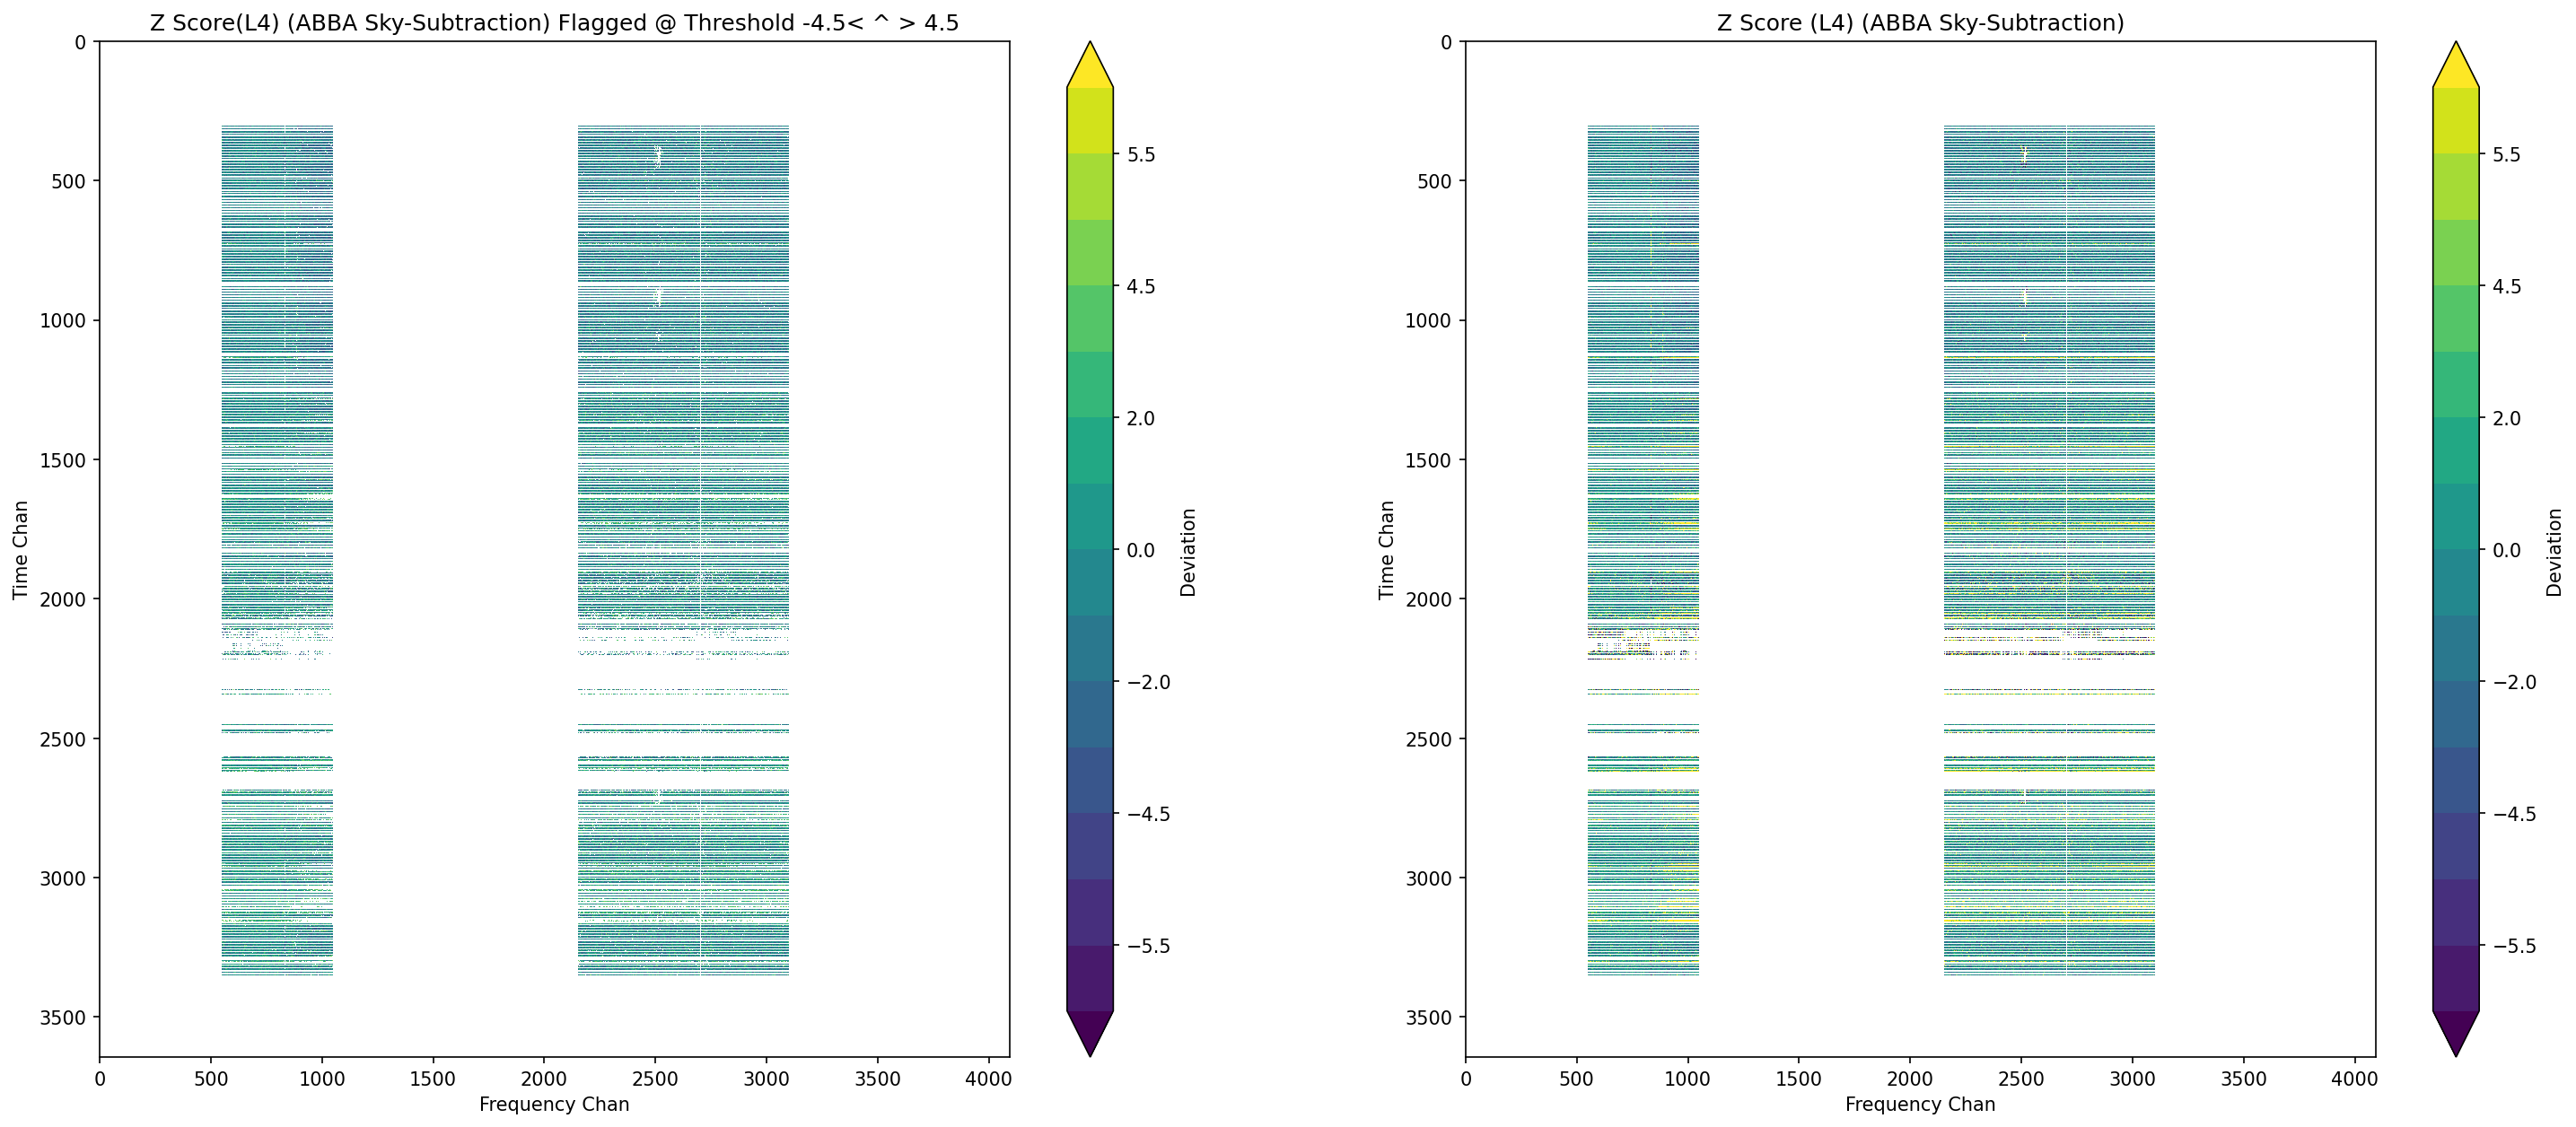

In [18]:
from matplotlib.colors import LogNorm
import matplotlib as mpl

figure, ax = plt.subplots(1, 2 , figsize=(24, 10), dpi=150)

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

plot_waterfall(data_masked, Title = 'Z Score(L4) (ABBA Sky-Subtraction) Flagged @ Threshold -4.5< ^ > 4.5', figsize=(20,12), cmap=cmap, norm=norm, xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Deviation', ax=ax[0]) 
plot_waterfall(zscore_level4, Title = 'Z Score (L4) (ABBA Sky-Subtraction)', figsize=(20,12), cmap=cmap, norm=norm, xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Deviation', ax=ax[1]) 

In [ ]:
#This function will return the flags for the raw data 

def mask_flags(zscore_mask):
    
    shape = list(zscore_mask.shape)
    flags_new = np.zeros([shape[0] + 3] + shape[1:], dtype=bool)  #(t, f) ----> (3467, 4096)  # expanded the dims
    flags_new[:-3] = zscore_mask
    flags_new[:] = np.logical_or(flags_new[:], flags_new[:])
    nd= nd_flags_dict['m000']
    nd_flags = np.ones_like(data_vis, dtype=bool)
    nd_flags[nd,:] = False                                         #unmasked data, the noise diodes
    allflags =  np.logical_or(nd_flags, flag_old)
    new_flags = np.logical_or(flags_new, allflags)
    return new_flags
        


In [ ]:
#This function will return the flags for the raw data 

def mask_to_flags(zscore_mask, nd_flags, l1_flags):
    
    shape = list(zscore_mask.shape)
    flags_new = np.zeros([shape[0] + 3] + shape[1:], dtype=bool)  #(t, f) ----> (3467, 4096)  # expanded the dims
    flags_new[:-3] = zscore_mask
    flags_new[:] = np.logical_or(flags_new[:], flags_new[:])
   
    allflags =  np.logical_or(nd_flags, l1_flags)
    new_flags = np.logical_or(flags_new, allflags)
    new_flags_dict = {}
    for ant in ants:
        new_flags_dict[ant[0]] = new_flags
        
        
        
    
    return new_flags_dict
        


In [ ]:
flags_new = mask_flags(z_score_map_abba_mask)

In [ ]:
from collections import defaultdict #stackexchange suggestion

d1 = l1_flags_dict
d2 = raw_vis_dict
d3 = nd_flags_dict
d4 = flags_new

dd = defaultdict(list)

for d in (d1, d2, d3, d4): # you can list as many input dicts as y
    for key, value in d.items():
        dd[key].append(value)
    
print(dd) # result: defaultdict(<type 'list'>, {1: [2, 6], 3: [4, 7]})


In [ ]:
masked_vis_update_dict = {}

for dish, (mask_flags, vis , nd_s0, flags_new) in dd.items():
   
    
    masked_vis = MaskedArrayVisibilityFlags(vis, mask_flags, nd_s0, new_flags = flags_new)
    masked_vis_dict[dish] = masked_vis

